In [23]:
import json
from pycocotools.coco import COCO
from sklearn.model_selection import StratifiedGroupKFold

In [24]:
file_path = '../../../dataset/train.json'
new_file_path = '../dataset'
K = 5

coco = COCO(file_path)

'''
x : annotataion
y : category
group : image_id
'''

ann_ids = coco.getAnnIds()
anns = coco.loadAnns(ann_ids)

X = []
Y = []
group = []

for ann in anns:
    X.append(ann['id'])
    Y.append(ann['category_id'])
    group.append(ann['image_id'])


sgkf = StratifiedGroupKFold(n_splits=K)
for i, (train_idx, test_idx) in enumerate(sgkf.split(X, Y, group)):
    print("train : ",train_idx)
    print("test : ", test_idx)
    train_file_name = f"/train{i}.json"
    valid_file_name = f"/valid{i}.json"

    train_coco = COCO(file_path)
    valid_coco = COCO(file_path)

    train_imgs = train_coco.loadImgs(set([group[idx] for idx in train_idx]))
    valid_imgs = valid_coco.loadImgs(set([group[idx] for idx in test_idx]))

    changes = [0] * len(coco.getImgIds())

    # img id 재할당
    for id, img in enumerate(train_imgs):
        img_id = img['id']
        img['id'] = id
        changes[img_id] = id
    train_anns = train_coco.loadAnns(train_idx)
    for ann in train_anns:
        ann["image_id"] = changes[ann["image_id"]]

    for id, img in enumerate(valid_imgs):
        img_id = img['id']
        img['id'] = id
        changes[img_id] = id
    valid_anns = valid_coco.loadAnns(test_idx)
    for ann in valid_anns:
        ann["image_id"] = changes[ann["image_id"]]

    # 새로운 img, ann 저장
    train_coco.dataset['annotations'] = train_anns
    train_coco.dataset['images'] = train_imgs
    valid_coco.dataset['annotations'] = valid_anns
    valid_coco.dataset["images"] = valid_imgs

    with open(new_file_path + train_file_name, 'w') as f:
        json.dump(train_coco.dataset, f)
    with open(new_file_path + valid_file_name, 'w') as f:
        json.dump(valid_coco.dataset, f)    

loading annotations into memory...
Done (t=0.24s)
creating index...
index created!
train :  [    0     1     2 ... 23136 23137 23138]
test :  [   43    44    45 ... 23141 23142 23143]
loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
loading annotations into memory...
Done (t=0.24s)
creating index...
index created!
train :  [    0     1     2 ... 23141 23142 23143]
test :  [   10    11    12 ... 23132 23133 23134]
loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
loading annotations into memory...
Done (t=0.24s)
creating index...
index created!
train :  [    0     1     2 ... 23141 23142 23143]
test :  [   41    42    51 ... 23136 23137 23138]
loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
loading annotations into memory...
Done (t=0.26s)
creating index...
index created!
train :  [    0     1     2 ... 23141 23142 23143]
test :  [    9    77    78 ... 23114 23115 23129]
loading annotat

# Stratified Group K Fold 결과 확인

In [25]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt

loading annotations into memory...
Done (t=0.22s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
<train>
imgs :  3912
anns :  18516
<valid>
imgs :  971
anns :  4628


<train/valid img intersection>
set()


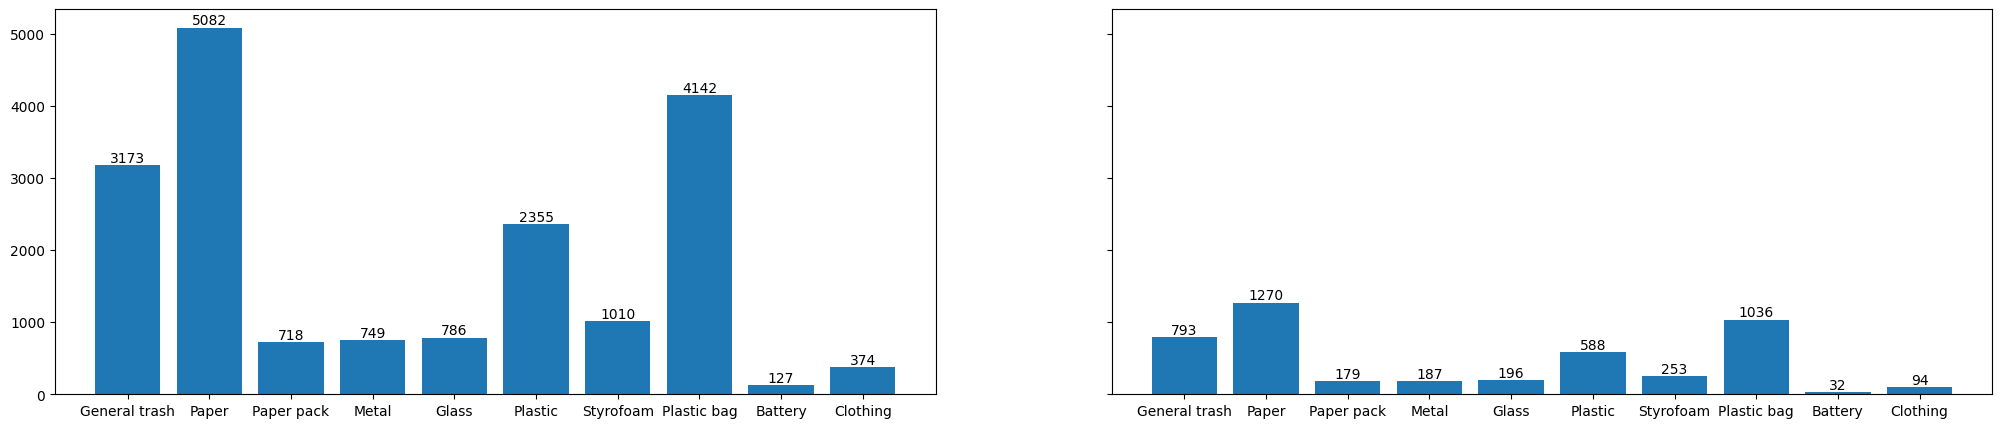

In [26]:
dataset_idx = 4
train = COCO(f'../dataset/train{dataset_idx}.json')
valid = COCO(f'../dataset/valid{dataset_idx}.json')

# train/valid img와  annotation 개수
print("<train>")
print("imgs : ", len(train.getImgIds()))
print("anns : ", len(train.getAnnIds()))
print("<valid>")
print("imgs : ", len(valid.getImgIds()))
print("anns : ", len(valid.getAnnIds()))


# train/valid 동시에 존재하는 img 검사
train_img = set()
valid_img = set()

for img in train.loadImgs(train.getImgIds()):
    train_img.add(img['file_name'])
for img in valid.loadImgs(valid.getImgIds()):
    valid_img.add(img['file_name'])

print("\n\n<train/valid img intersection>")
print(train_img.intersection(valid_img))

# train/valid 카테고리 분포 확인
categories = ["General trash", "Paper", "Paper pack", "Metal", "Glass", "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]
train_category_cnt = [0] * 10
valid_category_cnt = [0] * 10

for ann in train.loadAnns(train.getAnnIds()):
    train_category_cnt[ann['category_id']] += 1
for ann in valid.loadAnns(valid.getAnnIds()):
    valid_category_cnt[ann['category_id']] += 1

fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(25,5))

bar = axes[0].bar(categories, train_category_cnt)
for rect in bar:
    height = rect.get_height()
    axes[0].text(rect.get_x() + rect.get_width()/2.0, height, height, ha = "center", va = "bottom", size = 10)

bar = axes[1].bar(categories, valid_category_cnt)
for rect in bar:
    height = rect.get_height()
    axes[1].text(rect.get_x() + rect.get_width()/2.0, height, height, ha = "center", va = "bottom", size = 10)

plt.show()

